In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [144]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
gruz=pd.read_csv("Грузоперевозки.csv")
rynok_stroy=pd.read_csv("Данные рынка стройматериалов.csv")
lme=pd.read_csv("Индекс LME.csv")
macro=pd.read_csv("Макропоказатели.csv")
rynok_metal=pd.read_csv("Показатели рынка металла.csv")
fuel=pd.read_csv("Топливо.csv")
raw=pd.read_csv("Цены на сырье.csv")

In [145]:
print("||||||||||||||||||||||||||||||||||||||||||||||||||")
train.info()
print("|||||||||||||||||||||||||Грузоперевозки|||||||||||||||||||||||||")
gruz.info()
print("|||||||||||||||||||||||||Данные рынка стройматериалов|||||||||||||||||||||||||")
rynok_stroy.info()
print("|||||||||||||||||||||||||Индекс LME|||||||||||||||||||||||||")
lme.info()
print("|||||||||||||||||||||||||Макропоказатели|||||||||||||||||||||||||")
macro.info()
print("|||||||||||||||||||||||||Показатели рынка металла|||||||||||||||||||||||||")
rynok_metal.info()
print("|||||||||||||||||||||||||Топливо|||||||||||||||||||||||||")
fuel.info()
print("|||||||||||||||||||||||||Цены на сырье|||||||||||||||||||||||||")
raw.info()

||||||||||||||||||||||||||||||||||||||||||||||||||
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dt                400 non-null    object
 1   Цена на арматуру  400 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB
|||||||||||||||||||||||||Грузоперевозки|||||||||||||||||||||||||
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   dt                               302 non-null    object
 1   Индекс стоимости грузоперевозок  302 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ KB
|||||||||||||||||||||||||Данные рынка стройматериалов|||||||||||||||||||||||||
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24

In [ ]:
dfs=[
     train,
     gruz,
     rynok_stroy,
     lme,
     macro,
     rynok_metal,
     fuel,
     raw
     ]
for df in dfs:
    df.rename(columns=lambda x: 'dt' if x.lower() in ["date", "дата"] else x, inplace=True)

1
dt     2015-01-05
1      2015-01-12
2      2015-01-19
3      2015-01-26
4      2015-02-02
          ...    
395    2022-08-01
396    2022-08-08
397    2022-08-15
398    2022-08-22
399    2022-08-29
Name: dt, Length: 400, dtype: object
2
dt     2017-09-06
1      2017-09-13
2      2017-09-20
3      2017-09-27
4      2017-10-04
          ...    
297    2023-05-17
298    2023-05-24
299    2023-05-31
300    2023-06-07
301    2023-06-14
Name: dt, Length: 302, dtype: object
3
dt    2021-04-30
1     2021-05-31
2     2021-06-30
3     2021-07-31
4     2021-08-31
5     2021-09-30
6     2021-10-31
7     2021-11-30
8     2021-12-31
9     2022-01-31
10    2022-02-28
11    2022-03-31
12    2022-04-30
13    2022-05-31
14    2022-06-30
15    2022-07-31
16    2022-08-31
17    2022-09-30
18    2022-10-31
19    2022-11-30
20    2022-12-31
21    2023-01-31
22    2023-02-28
23    2023-03-31
24    2023-04-30
Name: dt, dtype: object
4
dt     2021-02-12
1      2021-02-15
2      2021-02-16
3      2021-02-17
4

In [149]:
merged_df=dfs[0]
for df in dfs[1:]:
    merged_df=pd.merge(merged_df,df,on="dt",how="left")
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 161 columns):
 #    Column                                                                                            Dtype  
---   ------                                                                                            -----  
 0    dt                                                                                                object 
 1    Цена на арматуру                                                                                  int64  
 2    Индекс стоимости грузоперевозок                                                                   float64
 3    Импорт цемента ЖД                                                                                 float64
 4    Экспорт цемента ЖД                                                                                float64
 5    Отгрузка цемента хоппер ЖД                                                                        float6

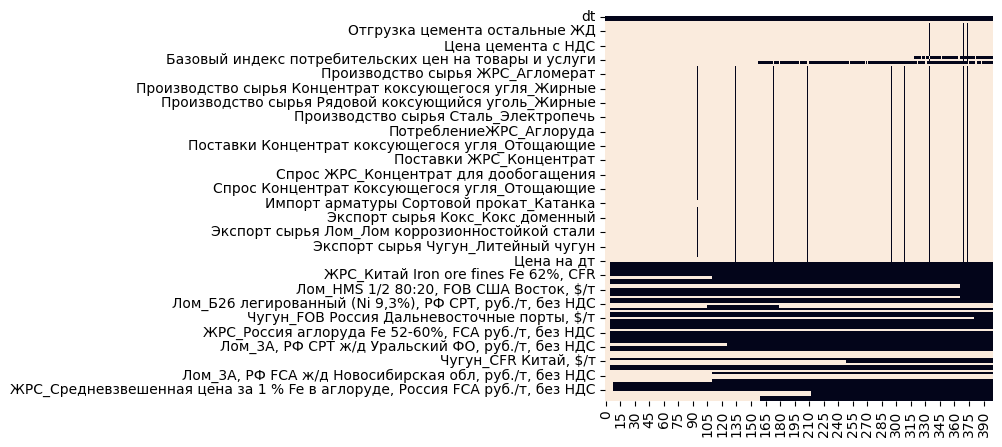

In [150]:
plt.figure(figsize=(5,5))
sb.heatmap(merged_df.transpose().isnull(), cbar=False)
plt.show()

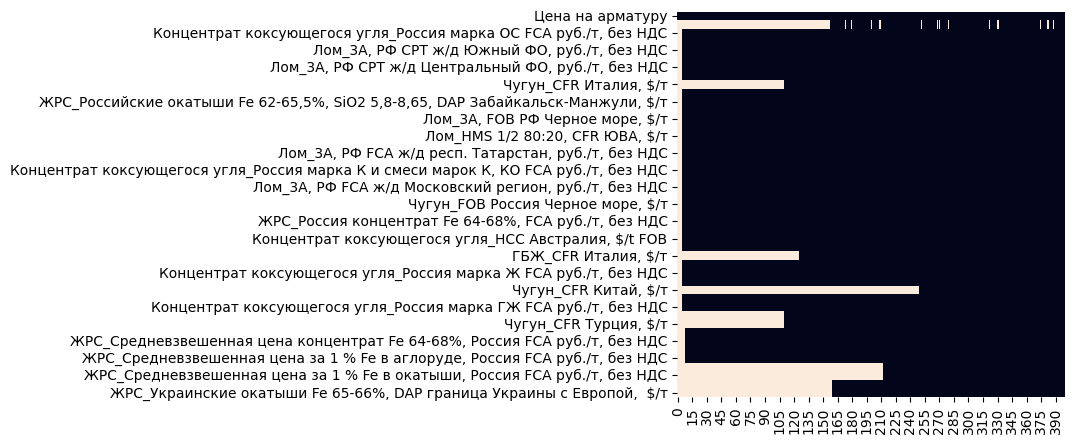

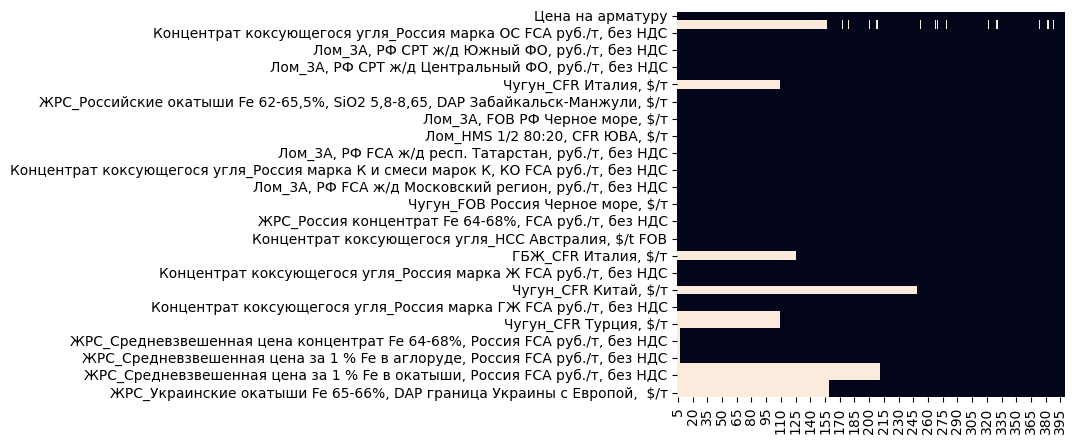

,Цена на арматуру,Ключевая ставка,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС",...,"Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т"
5,30300,NaN,3850.0,228.0,12344.0,10009.0,12728.0,62.0,NaN,3700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30100,NaN,3850.0,206.0,12271.0,10432.0,12852.0,63.0,NaN,3700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,29400,NaN,3850.0,207.0,12645.0,11981.0,13034.0,64.0,NaN,3700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,29200,NaN,3850.0,214.0,12696.0,11912.0,12910.0,63.0,NaN,3700.0,...,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN
9,29000,NaN,4400.0,232.0,12916.0,12061.0,12964.0,61.0,NaN,4050.0,...,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN


In [ ]:
clanky_df=merged_df.copy()
dates=df
clanky_df.drop("dt",axis=1,inplace=True)
clanky_df.dropna(thresh=len(clanky_df)*.20,axis=1,inplace=True)
plt.figure(figsize=(5,5))
sb.heatmap(clanky_df.transpose().isnull(), cbar=False)
plt.show()
clanky_df.dropna(thresh=len(clanky_df)*.05,axis=0,inplace=True)
plt.figure(figsize=(5,5))
sb.heatmap(clanky_df.transpose().isnull(), cbar=False)
plt.show()
clanky_df.head()